In [ ]:
# TECHNICAL INDICATORS CALCULATION AND DATA GENERATION 
import pandas as pd
import numpy as np

# Define a function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define a function to calculate Moving Average (MA)
def calculate_ma(df, period=20):
    ma = df['Close'].rolling(window=period, min_periods=1).mean()
    return ma

# Define a function to preprocess the data
def preprocess_crypto_data(file_path, output_path):
    df = pd.read_csv(file_path)
    
    # Ensure Datetime is in datetime format
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Drop unnecessary columns
    df.drop(columns=['Low', 'Dividends', 'Stock Splits'], inplace=True, errors='ignore')
    
    # Interpolate missing values linearly, which is better suited for time series data
    df.interpolate(method='linear', inplace=True)
    
    # Calculate RSI and MA
    df['RSI'] = calculate_rsi(df)
    df['MA'] = calculate_ma(df)
    
    # Ensure no missing values in calculated columns
    df['RSI'].fillna(method='bfill', inplace=True)
    df['RSI'].fillna(method='ffill', inplace=True)
    df['MA'].fillna(method='bfill', inplace=True)
    df['MA'].fillna(method='ffill', inplace=True)
    
    # Save the processed data to a new CSV file
    df.to_csv(output_path, index=False)
    print(f'Processed data saved to {output_path}')

# List of cryptocurrency symbols
cryptos = ['NMC', 'BCH', 'DASH', 'DOGE', 'LTC', 'ETH']

# Process each CSV file
for crypto in cryptos:
    input_file_path = f'{crypto}.csv'
    output_file_path = f'{crypto}_processed.csv'
    preprocess_crypto_data(input_file_path, output_file_path)

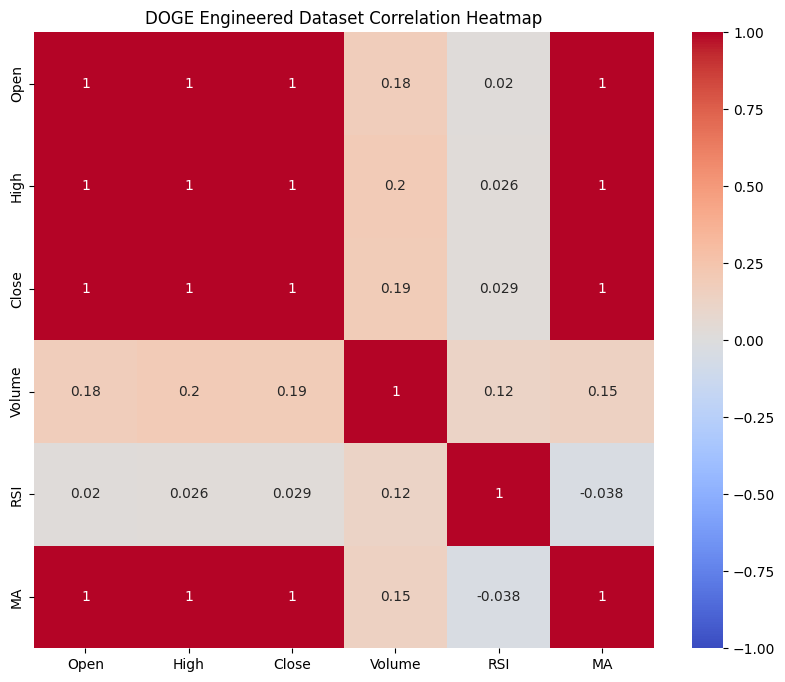

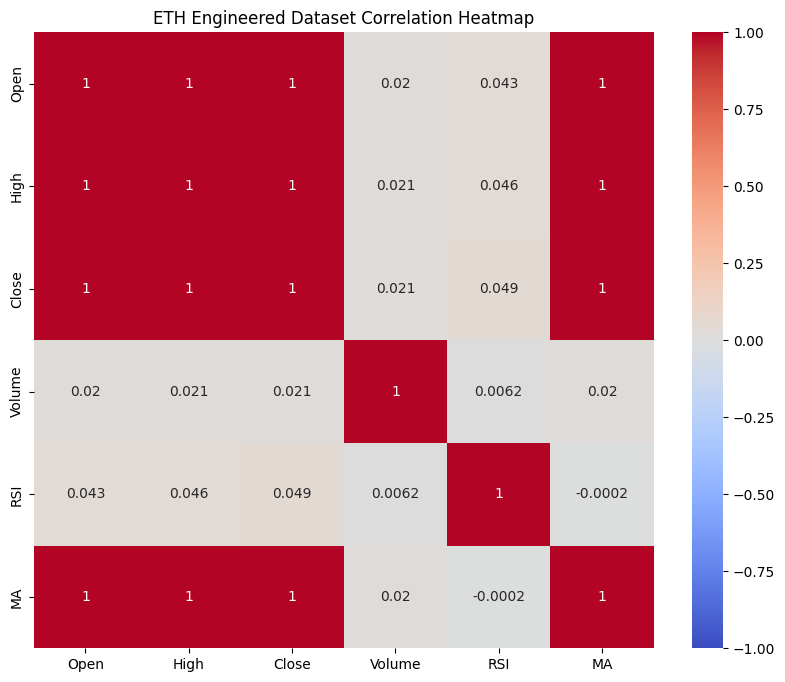

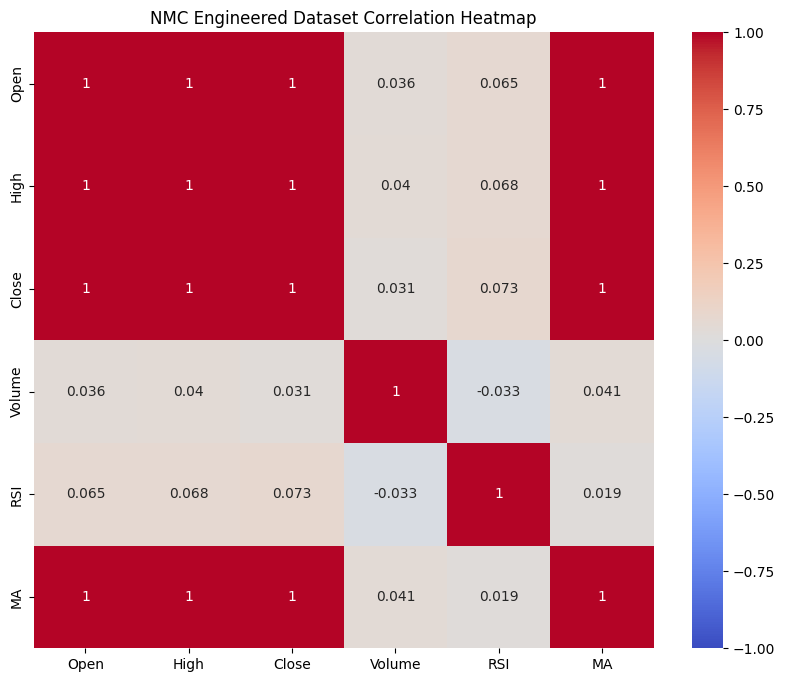

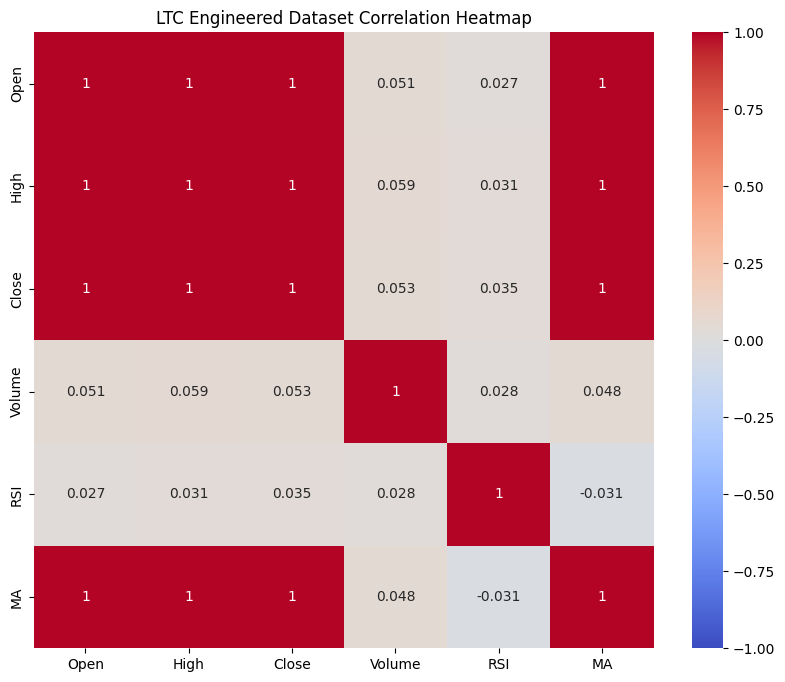

Average absolute correlation in engineered dataset: 0.43
Percentage reduction in correlation: 56.83%


In [5]:
# CORRELATION HEATMAP BETWEEN FEATURES IN EACH ENGINEERED DATASETS 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your engineered OHLCV datasets
doge_data = pd.read_csv('DOGE.csv')  # Replace with your actual file path
eth_data = pd.read_csv('ETH.csv')    # Replace with your actual file path
nmc_data = pd.read_csv('NMC.csv')    # Replace with your actual file path
ltc_data = pd.read_csv('LTC.csv')    # Replace with your actual file path

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, title):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Function to calculate average absolute correlation
def average_absolute_correlation(data):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    corr_matrix = numeric_data.corr().abs()  # Compute absolute value of the correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    avg_corr = upper_tri.stack().mean()  # Compute the average of the upper triangle of the correlation matrix
    return avg_corr

# Plot correlation heatmaps for engineered OHLCV datasets and calculate average correlations
doge_corr = average_absolute_correlation(doge_data)
eth_corr = average_absolute_correlation(eth_data)
nmc_corr = average_absolute_correlation(nmc_data)
ltc_corr = average_absolute_correlation(ltc_data)

plot_correlation_heatmap(doge_data, 'DOGE Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(eth_data, 'ETH Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(nmc_data, 'NMC Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(ltc_data, 'LTC Engineered Dataset Correlation Heatmap')

# Calculate the average correlation of all engineered datasets
avg_corr_engineered = np.mean([doge_corr, eth_corr, nmc_corr, ltc_corr])

# Since we know the correlations in OHLCV are 1 for the price metrics
avg_corr_ohlcv = 1.0  # This is an overestimate, but we assume it's a perfect correlation for this case

# Calculate the percentage reduction in correlation
correlation_reduction = ((avg_corr_ohlcv - avg_corr_engineered) / avg_corr_ohlcv) * 100

print(f"Average absolute correlation in engineered dataset: {avg_corr_engineered:.2f}")
print(f"Percentage reduction in correlation: {correlation_reduction:.2f}%")

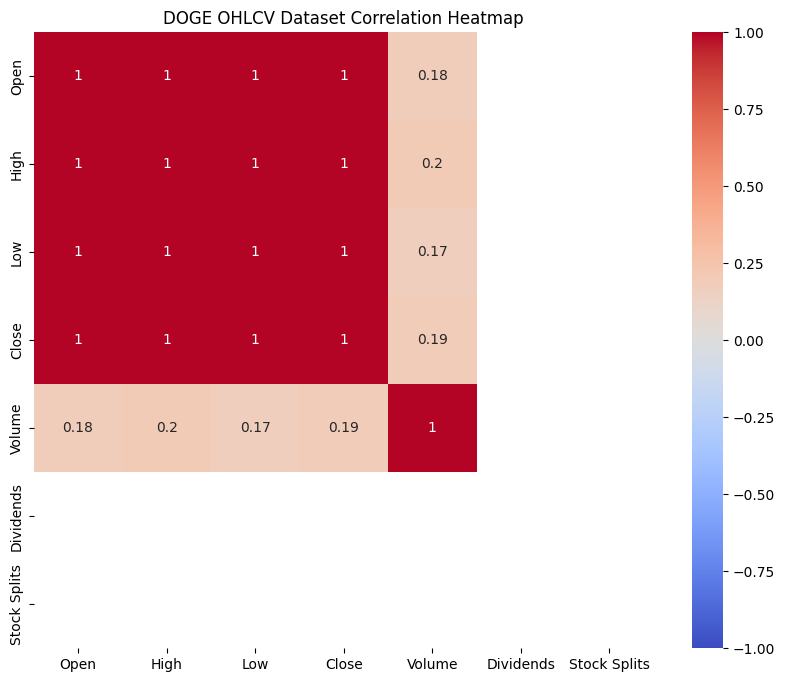

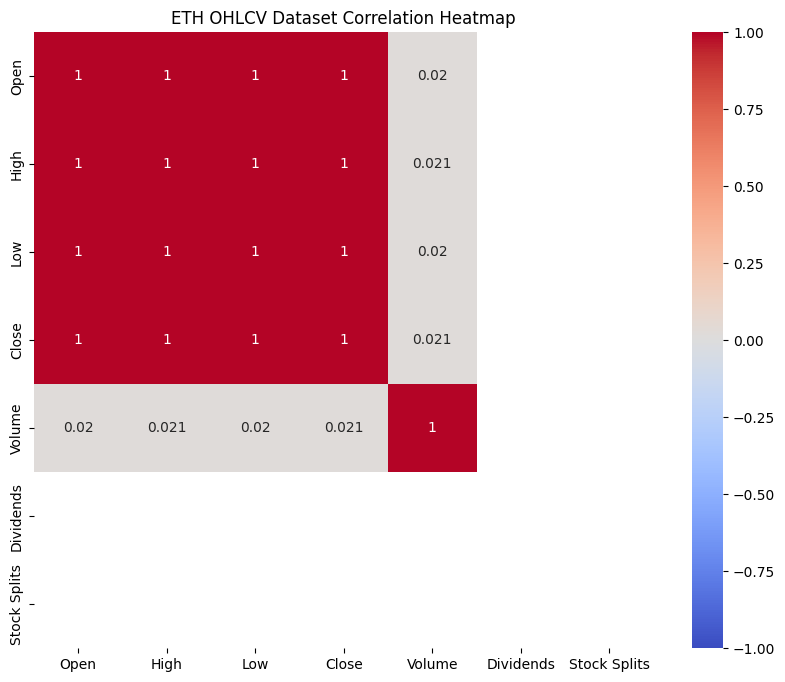

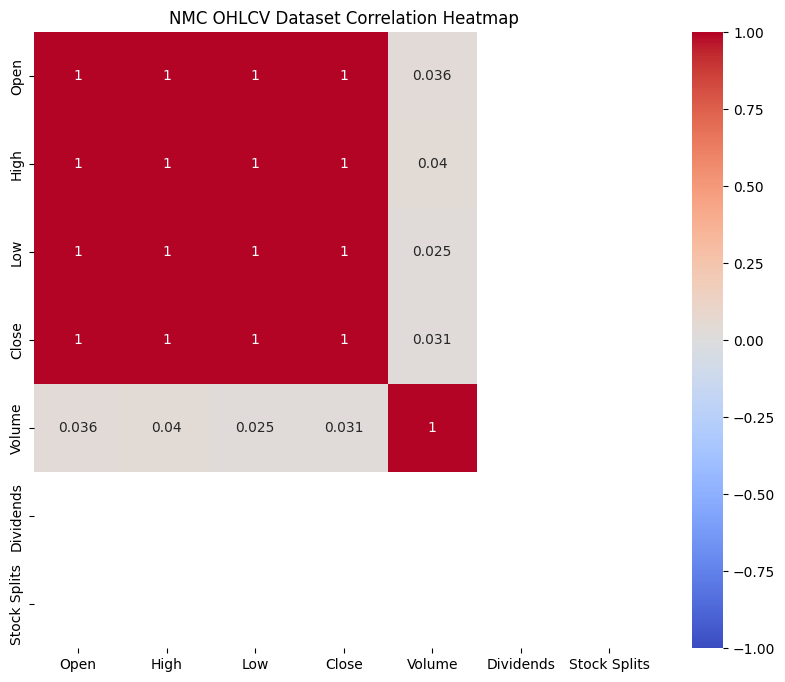

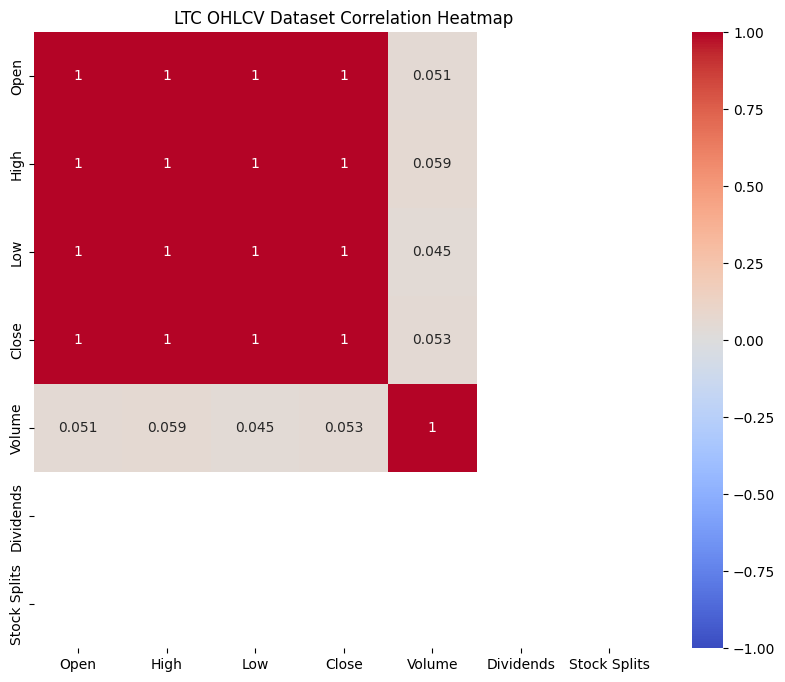

Average absolute correlation in engineered dataset: 0.63
Percentage reduction in correlation: 37.13%


In [3]:
# CORRELATION HEATMAP BETWEEN FEATURES IN EACH ENGINEERED DATASETS 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your engineered OHLCV datasets
doge_data = pd.read_csv('OHLCV/DOGE.csv')  # Replace with your actual file path
eth_data = pd.read_csv('OHLCV/ETH.csv')    # Replace with your actual file path
nmc_data = pd.read_csv('OHLCV/NMC.csv')    # Replace with your actual file path
ltc_data = pd.read_csv('OHLCV/LTC.csv')    # Replace with your actual file path

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, title):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Function to calculate average absolute correlation
def average_absolute_correlation(data):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    corr_matrix = numeric_data.corr().abs()  # Compute absolute value of the correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    avg_corr = upper_tri.stack().mean()  # Compute the average of the upper triangle of the correlation matrix
    return avg_corr

# Plot correlation heatmaps for engineered OHLCV datasets and calculate average correlations
doge_corr = average_absolute_correlation(doge_data)
eth_corr = average_absolute_correlation(eth_data)
nmc_corr = average_absolute_correlation(nmc_data)
ltc_corr = average_absolute_correlation(ltc_data)

plot_correlation_heatmap(doge_data, 'DOGE OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(eth_data, 'ETH OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(nmc_data, 'NMC OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(ltc_data, 'LTC OHLCV Dataset Correlation Heatmap')

# Calculate the average correlation of all engineered datasets
avg_corr_engineered = np.mean([doge_corr, eth_corr, nmc_corr, ltc_corr])

# Since we know the correlations in OHLCV are 1 for the price metrics
avg_corr_ohlcv = 1.0  # This is an overestimate, but we assume it's a perfect correlation for this case

# Calculate the percentage reduction in correlation
correlation_reduction = ((avg_corr_ohlcv - avg_corr_engineered) / avg_corr_ohlcv) * 100

print(f"Average absolute correlation in engineered dataset: {avg_corr_engineered:.2f}")
print(f"Percentage reduction in correlation: {correlation_reduction:.2f}%")


Class Distribution for DOGE:
Label
1    2199
0    2176
Name: count, dtype: int64


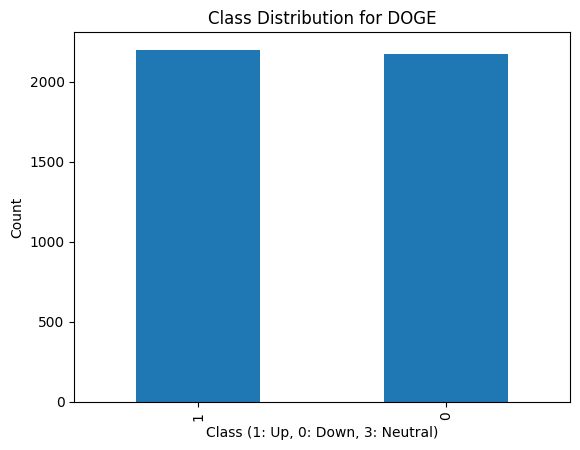


Class Distribution for ETH:
Label
1    2214
0    2162
Name: count, dtype: int64


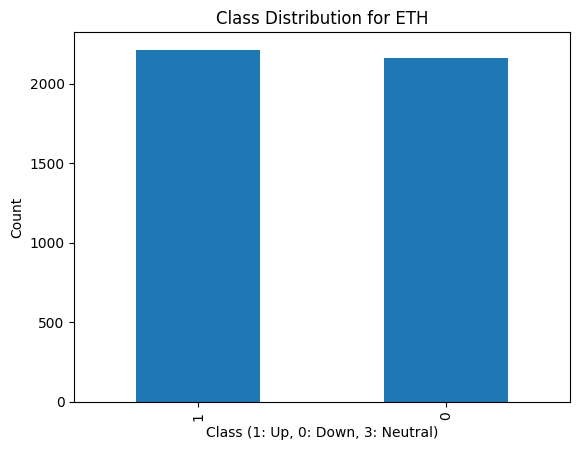


Class Distribution for NMC:
Label
0    2249
1    2127
Name: count, dtype: int64


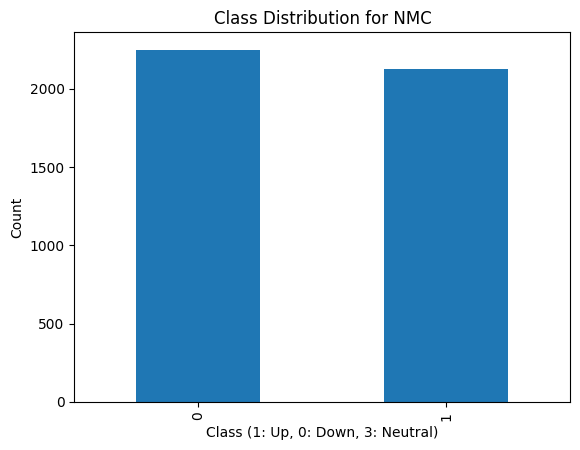


Class Distribution for LTC:
Label
1    2237
0    2138
Name: count, dtype: int64


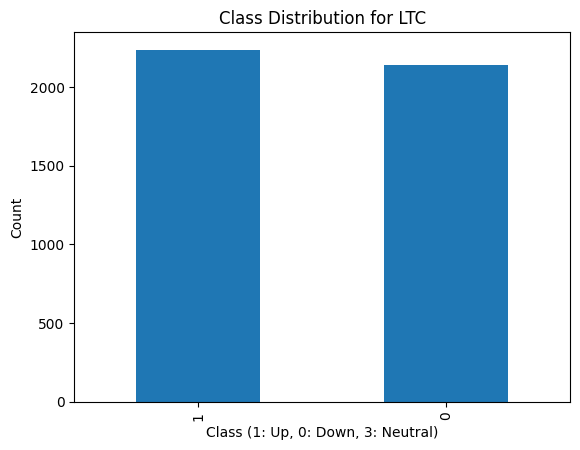


All Data Processed and Plots Generated!


In [9]:
# DESIGN CLASSIFICATION LOGIC (UP, DOWN, AND NEUTRAL)

import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate labels with Neutral
def calculate_label(row):
  if row['Close'] > row['Open']:
    return 1  # Up
  elif row['Close'] < row['Open']:
    return 0  # Down
  else:
    return 3  # Neutral

# Loop through each cryptocurrency dataset
currencies = ['DOGE', 'ETH', 'NMC', 'LTC']
for currency in currencies:
  # Load the dataset
  df = pd.read_csv(f'{currency}.csv')

  # Ensure the 'Datetime' column is in datetime format
  df['Datetime'] = pd.to_datetime(df['Datetime'])

  # Ensure the data is sorted by datetime
  df = df.sort_values(by='Datetime')

  # Resample data into 4-hour periods
  df_4h = df.resample('4H', on='Datetime').agg({
    'Open': 'first',
    'High': 'max',
    'Close': 'last',
    'Volume': 'sum'
  }).dropna()

  # Calculate labels
  df_4h['Label'] = df_4h.apply(calculate_label, axis=1)

  # Display class distribution
  print(f"\nClass Distribution for {currency}:")
  print(df_4h['Label'].value_counts())

  # Plot class distribution
  df_4h['Label'].value_counts().plot(kind='bar')
  plt.xlabel('Class (1: Up, 0: Down, 3: Neutral)')
  plt.ylabel('Count')
  plt.title(f'Class Distribution for {currency}')
  plt.show()

print("\nAll Data Processed and Plots Generated!")

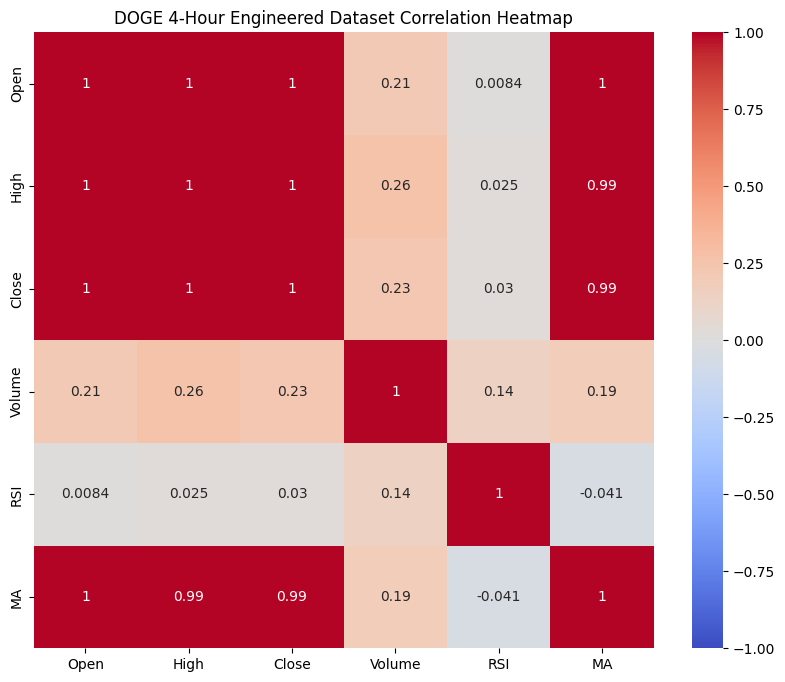

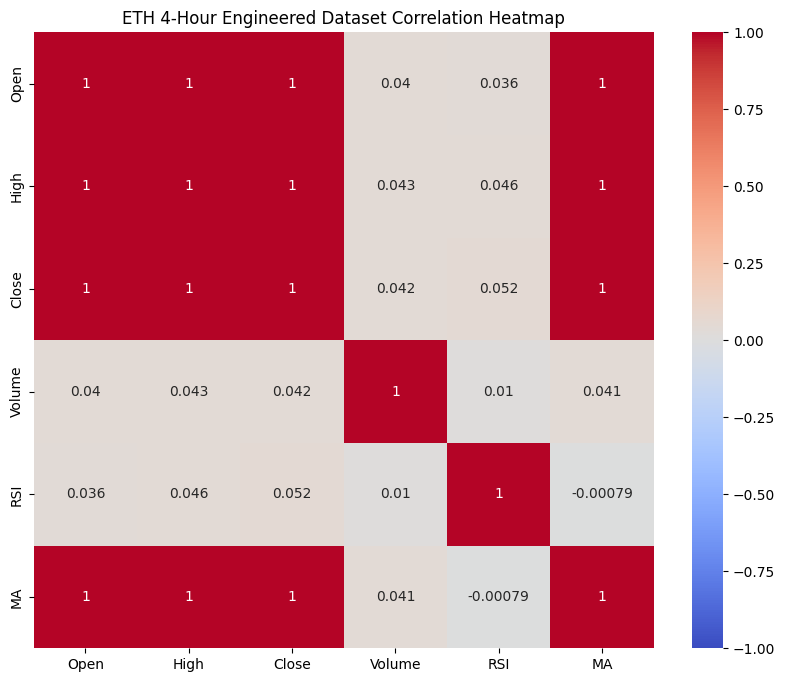

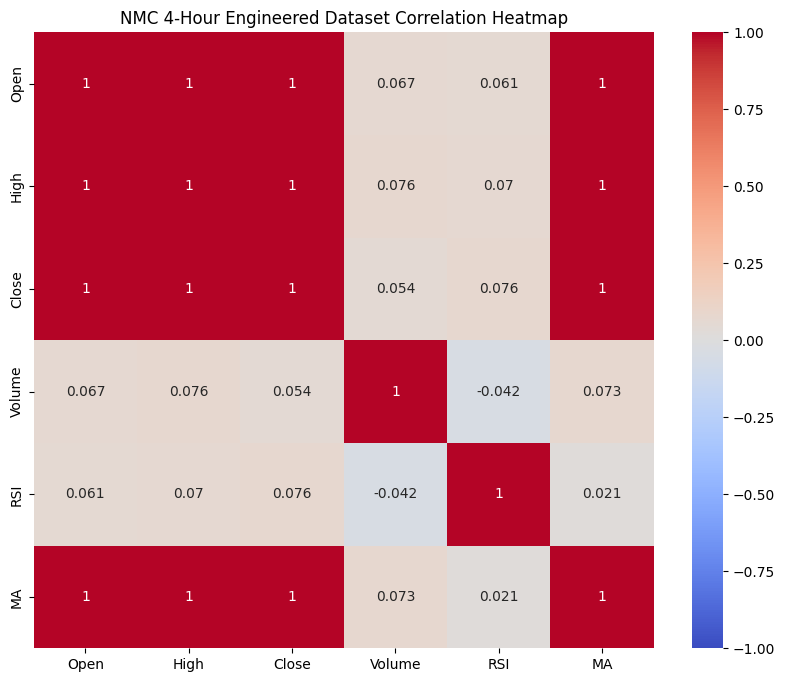

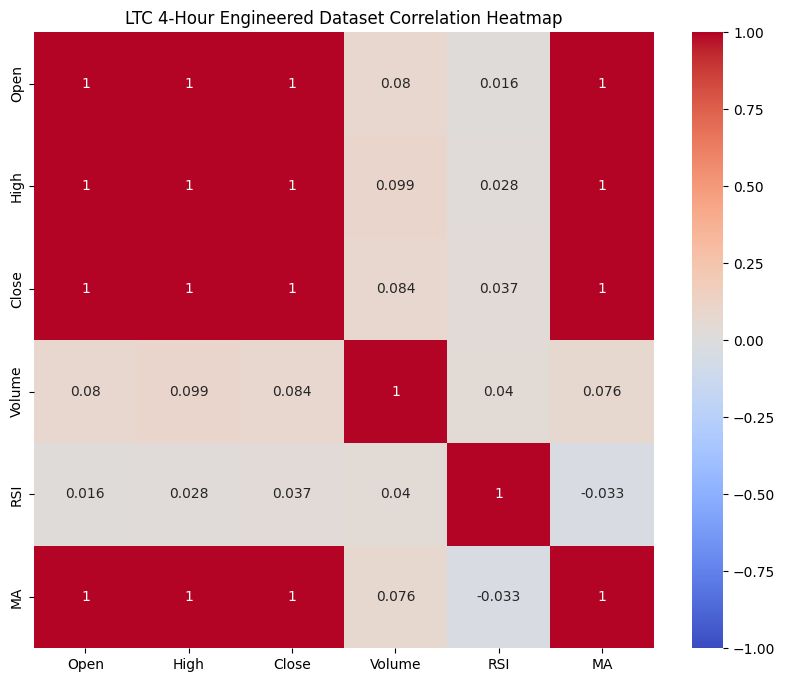

In [13]:
# Correlation of trends between variables in the 4-hour interval 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your OHLCV datasets
doge_data = pd.read_csv('DOGE.csv', parse_dates=['Datetime'], index_col='Datetime')  # Replace with your actual file path
eth_data = pd.read_csv('ETH.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path
nmc_data = pd.read_csv('NMC.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path
ltc_data = pd.read_csv('LTC.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path

# Function to resample data to 4-hour intervals
def resample_to_4h(data):
    return data.resample('4H').agg({
        'Open': 'first',
        'High': 'max',
        'Close': 'last',
        'Volume': 'sum',
        'RSI': 'mean',  # Assuming RSI should be averaged over the 4-hour period
        'MA': 'mean'    # Assuming MA should be averaged over the 4-hour period
    }).dropna()

# Resample the data
doge_data_4h = resample_to_4h(doge_data)
eth_data_4h = resample_to_4h(eth_data)
nmc_data_4h = resample_to_4h(nmc_data)
ltc_data_4h = resample_to_4h(ltc_data)

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, title):
    numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot correlation heatmaps for each 4-hour resampled OHLCV dataset
plot_correlation_heatmap(doge_data_4h, 'DOGE 4-Hour Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(eth_data_4h, 'ETH 4-Hour Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(nmc_data_4h, 'NMC 4-Hour Engineered Dataset Correlation Heatmap')
plot_correlation_heatmap(ltc_data_4h, 'LTC 4-Hour Engineered Dataset Correlation Heatmap')

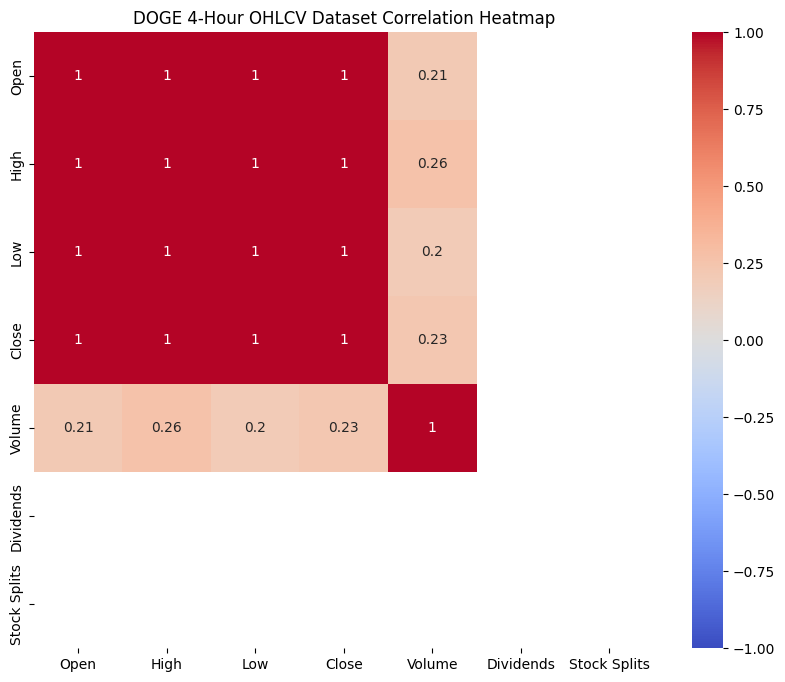

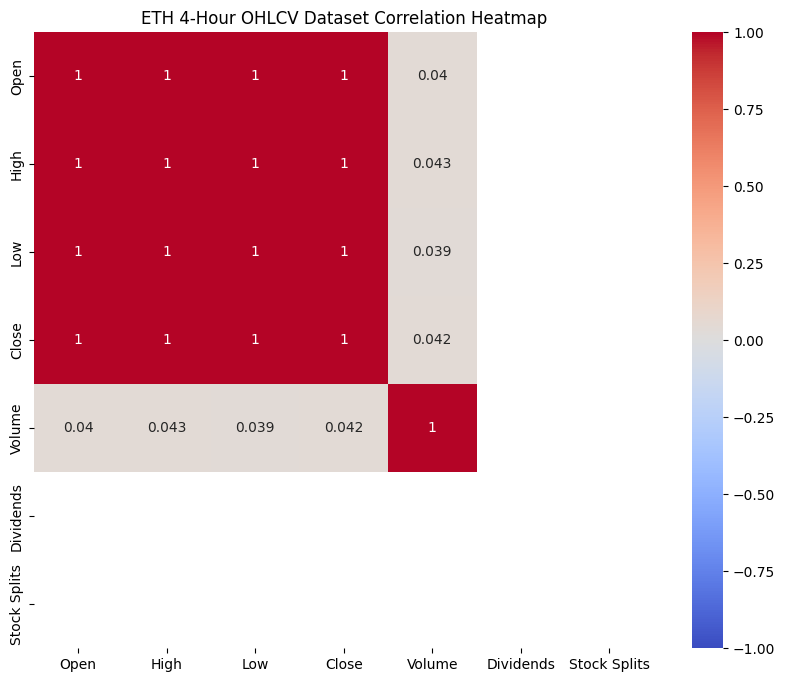

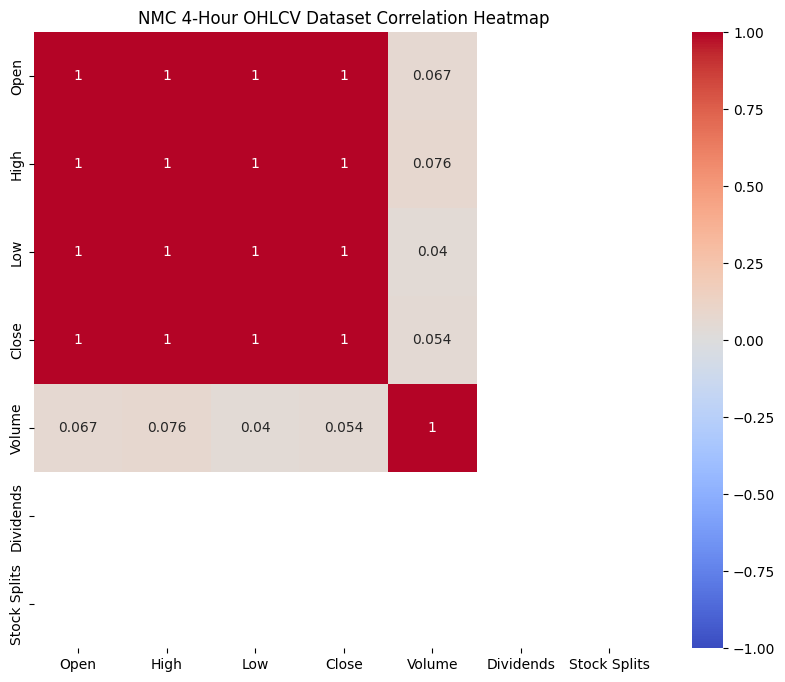

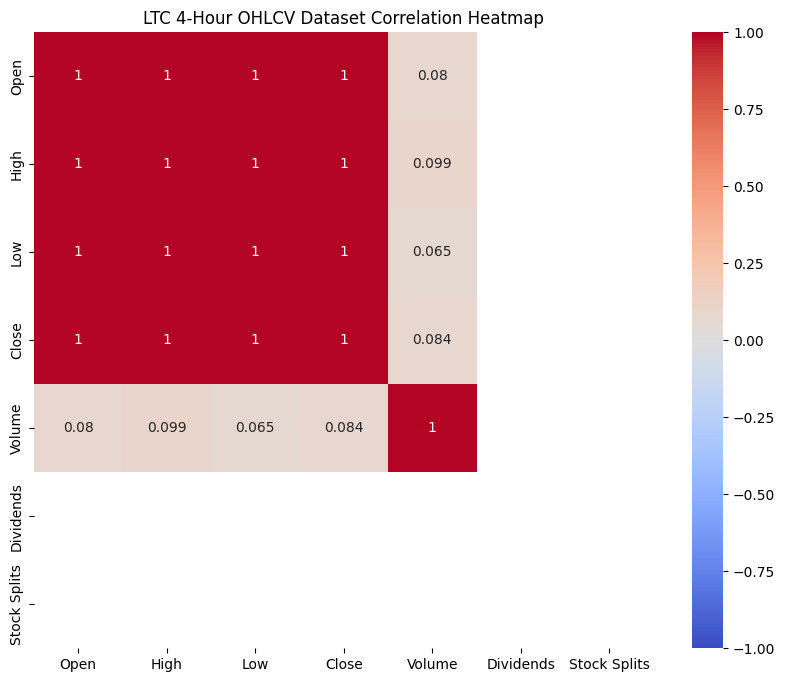

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your OHLCV datasets
doge_data = pd.read_csv('OHLCV/DOGE.csv', parse_dates=['Datetime'], index_col='Datetime')  # Replace with your actual file path
eth_data = pd.read_csv('OHLCV/ETH.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path
nmc_data = pd.read_csv('OHLCV/NMC.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path
ltc_data = pd.read_csv('OHLCV/LTC.csv', parse_dates=['Datetime'], index_col='Datetime')    # Replace with your actual file path

# Function to resample data to 4-hour intervals
def resample_to_4h(data):
    return data.resample('4H').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum',
        'Dividends': 'sum',  # Assuming Dividends should be summed over the 4-hour period
        'Stock Splits': 'sum'  # Assuming Stock Splits should be summed over the 4-hour period
    }).dropna()

# Resample the data
doge_data_4h = resample_to_4h(doge_data)
eth_data_4h = resample_to_4h(eth_data)
nmc_data_4h = resample_to_4h(nmc_data)
ltc_data_4h = resample_to_4h(ltc_data)

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, title):
    numeric_data = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]  # Select specific columns
    corr = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot correlation heatmaps for each 4-hour resampled OHLCV dataset
plot_correlation_heatmap(doge_data_4h, 'DOGE 4-Hour OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(eth_data_4h, 'ETH 4-Hour OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(nmc_data_4h, 'NMC 4-Hour OHLCV Dataset Correlation Heatmap')
plot_correlation_heatmap(ltc_data_4h, 'LTC 4-Hour OHLCV Dataset Correlation Heatmap')

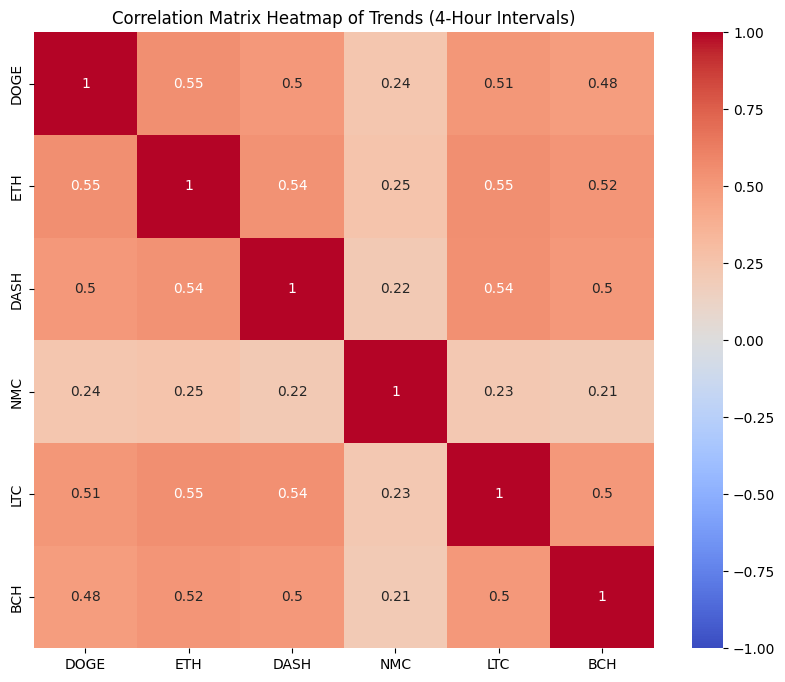

In [8]:
#CORRELATION HEATMAP BETWEEN CRYPTO DATASETS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
doge = pd.read_csv('DOGE.csv', parse_dates=['Datetime'])
eth = pd.read_csv('ETH.csv', parse_dates=['Datetime'])
dash = pd.read_csv('DASH.csv', parse_dates=['Datetime'])
nmc = pd.read_csv('NMC.csv', parse_dates=['Datetime'])
ltc = pd.read_csv('LTC.csv', parse_dates=['Datetime'])
bch = pd.read_csv('BCH.csv', parse_dates=['Datetime'])

# Ensure the datetime column is the index
doge.set_index('Datetime', inplace=True)
eth.set_index('Datetime', inplace=True)
dash.set_index('Datetime', inplace=True)
nmc.set_index('Datetime', inplace=True)
ltc.set_index('Datetime', inplace=True)
bch.set_index('Datetime', inplace=True)

# Resample function to determine trend (up or down)
def resample_trend(df):
    resampled = df.resample('4H').agg({
        'Open': 'first',
        'Close': 'last'
    })
    resampled['Trend'] = (resampled['Close'] - resampled['Open']).apply(lambda x: 1 if x > 0 else 0)
    return resampled

# Resample each cryptocurrency's data
doge_resampled = resample_trend(doge)
eth_resampled = resample_trend(eth)
dash_resampled = resample_trend(dash)
nmc_resampled = resample_trend(nmc)
ltc_resampled = resample_trend(ltc)
bch_resampled = resample_trend(bch)

# Combine the resampled trend data into a single DataFrame
trend_df = pd.DataFrame({
    'DOGE': doge_resampled['Trend'],
    'ETH': eth_resampled['Trend'],
    'DASH': dash_resampled['Trend'],
    'NMC': nmc_resampled['Trend'],
    'LTC': ltc_resampled['Trend'],
    'BCH': bch_resampled['Trend']
})

# Drop rows with missing values
trend_df.dropna(inplace=True)

# Calculate the correlation matrix for trends
trend_correlation_matrix = trend_df.corr()

# Plot the trend heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(trend_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Trends (4-Hour Intervals)')
plt.show()

In [ ]:
#DATA GENERATING and FEATURE ENGINEERING
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import ceil, sqrt

# Define colors and markers for the plots
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'x', '*']

# Define a function to normalize the data
def normalize(df, features):
    result = df.copy()
    for feature in features:
        max_value = df[feature].max()
        min_value = df[feature].min()
        result[feature] = (df[feature] - min_value) / (max_value - min_value)
    return result

# Define a function to create a line graph for a feature
def create_line_graph(df, feature, color, marker, ax):
    ax.plot(df['Datetime'], df[feature], color=color, marker=marker, linestyle='-', linewidth=2, markersize=5)
    ax.grid(True)  # Ensure the grid is enabled
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_yticks([])  # Remove y-axis labels

# Define a function to arrange multiple line graphs into a grid layout and save as an image
def save_combined_image(df, features, output_path):
    num_features = len(features)
    grid_size = ceil(sqrt(num_features))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axs = axs.flatten()

    for i, feature in enumerate(features):
        create_line_graph(df, feature, colors[i % len(colors)], markers[i % len(markers)], axs[i])
        axs[i].label_outer()  # Hide x labels and tick labels for top plots and y ticks for right plots.

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])  # Remove empty subplots

    plt.subplots_adjust(wspace=0.01, hspace=0.01)  # Bring subplots closer together
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)  # Save as high-resolution image
    plt.close(fig)

# List of cryptocurrency symbols
cryptos = ['DOGE']
input_dir = './'  # Use current directory
base_output_dir = './processed_images/Outsample'  # Base directory for output

if not os.path.exists(base_output_dir):
    os.makedirs(base_output_dir)

# Specify the starting index to resume from
start_index = 0000

# Process each CSV file
for crypto in cryptos:
    input_file_path = os.path.join(input_dir, f'{crypto}.csv')
    df = pd.read_csv(input_file_path)

    # Ensure Datetime is in datetime format
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    # List of features to plot
    features = ['Open', 'High', 'Close', 'Volume', 'RSI', 'MA']

    # Normalize data
    df = normalize(df, features)

    # Create a specific output directory for each cryptocurrency
    output_dir = os.path.join(base_output_dir, crypto)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create images for every 4 trading hours
    num_images = len(df) // 4
    print(f'Processing {crypto}: {num_images} images will be created.')

    for i in range(start_index, num_images):
        sub_df = df.iloc[i*4:(i+1)*4]
        output_file_path = os.path.join(output_dir, f'{crypto}_image_{i:04d}.png')
        save_combined_image(sub_df, features, output_file_path)
        print(f'Processed {crypto} data and saved image {i:04d} to {output_file_path}')

In [ ]:
#LABEL THE DATA (ALL IN ONE)
import pandas as pd
import os

# Define a list of cryptocurrency directories and their respective label files
cryptos = ['DOGE', 'ETH', 'LTC', 'NMC']
label_files = ['DOGE_labels.csv', 'ETH_labels.csv', 'LTC_labels.csv', 'NMC_labels.csv']

data = []

# Process each cryptocurrency
for crypto, label_file in zip(cryptos, label_files):
    # Load the CSV file with labels
    labels_df = pd.read_csv(label_file)
    
    # Ensure the Image column is named correctly
    image_column = 'Image'
    label_column = 'Label'
    
    # Get the directory containing images for this cryptocurrency
    image_directory = crypto
    image_files = os.listdir(image_directory)
    
    # Process each image file
    for image_file in image_files:
        # Extract image name from the file name
        image_name = image_file  # The full file name should match the 'Image' column exactly
        
        # Debugging print statements
        print(f"Processing image: {image_name}")
        
        # Find the corresponding label in the dataframe
        matched_labels = labels_df.loc[labels_df[image_column] == image_name, label_column]
        
        if matched_labels.empty:
            print(f"No match found for image: {image_name}")
            continue  # Skip this image if no match found
        
        label = matched_labels.values[0]
        
        # Append image path and label to the data list
        data.append((os.path.join(image_directory, image_file), label))

# Convert to a DataFrame for easier handling
data_df = pd.DataFrame(data, columns=['image_path', 'label'])

# Optionally, save this dataframe to a new CSV for future use
data_df.to_csv('images_with_labels.csv', index=False)

print("Labels connected to images successfully.")

In [ ]:
#SPLIT THE ULTIMATE LABEL SET INTO EQUIVALENT SETS OF DATA FOR 4 CRYPTO PAIRS
import pandas as pd

# Load the combined data
data_df = pd.read_csv('images_with_labels.csv')

# Split the dataframe into separate dataframes for each cryptocurrency
cryptos = ['DOGE', 'ETH', 'LTC', 'NMC']

for crypto in cryptos:
    crypto_df = data_df[data_df['image_path'].str.contains(crypto)]
    crypto_df.to_csv(f'{crypto}_images_with_labels.csv', index=False)
    print(f"{crypto} dataset created with {len(crypto_df)} records.")

In [3]:
#DATA SPLITTING (SPLIT TO TRAIN/VALIDATION/TEST SETS TO AVOID DATA LEAKAGE)
#70-20-10 SPLIT 

import pandas as pd

# Load the dataset
df = pd.read_csv('NMC_images_with_labels.csv')

# Determine the number of rows
n = len(df)

# Calculate the split indices
train_end = int(0.7 * n)
val_end = int(0.9 * n)

# Split the data (no shuffling to maintain temporal dependencies)
train_data = df[:train_end]
val_data = df[train_end:val_end]
test_data = df[val_end:]

# Save the splits to CSV files
train_data.to_csv('train_NMC_images_with_labels.csv', index=False)
val_data.to_csv('val_NMC_images_with_labels.csv', index=False)
test_data.to_csv('test_NMC_images_with_labels.csv', index=False)

In [7]:
#TRAIN AND VALIDATION PROCESS 

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import timm
import torch.nn as nn
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the split datasets
train_df = pd.read_csv('train_LTC_images_with_labels.csv')
val_df = pd.read_csv('val_LTC_images_with_labels.csv')

# Define the dataset class
class CryptoDataset(Dataset):
    def __init__(self, data_frame, transform=None):
        self.data_frame = data_frame
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = self.data_frame.iloc[idx]['image_path']
        image = Image.open(img_name).convert('RGB')  # Convert to RGB
        label = int(self.data_frame.iloc[idx]['label'])

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets
train_dataset = CryptoDataset(data_frame=train_df, transform=transform)
val_dataset = CryptoDataset(data_frame=val_df, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)  # Ensuring no shuffle
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pre-trained Swin Transformer model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=2)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training and validation loop
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    val_loss = 0.0
    val_correct = 0
    val_total = 0
    all_labels = []
    all_predictions = []
    all_probs = []
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            probs = torch.softmax(outputs, dim=1)[:, 1]
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = 100 * val_correct / val_total
    auroc = roc_auc_score(all_labels, all_probs)
    precision, recall, _ = precision_recall_curve(all_labels, all_probs)
    auprc = auc(recall, precision)
    precision_score_value = precision_score(all_labels, all_predictions)
    recall_score_value = recall_score(all_labels, all_predictions)
    f1_score_value = f1_score(all_labels, all_predictions)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {val_accuracy}, AUROC: {auroc}, AUPRC: {auprc}, Precision: {precision_score_value}, Recall: {recall_score_value}, F1 Score: {f1_score_value}')

# Save the model after training
torch.save(model.state_dict(), 'LTC_trained_model.pth')

Epoch [1/10], Loss: 0.2731666853069328, Val Loss: 0.21969550688351905, Val Accuracy: 89.58810068649886, AUROC: 0.9937370722383683, AUPRC: 0.9938761839214747, Precision: 0.9971098265895953, Recall: 0.7931034482758621, F1 Score: 0.8834827144686299
Epoch [2/10], Loss: 0.13858030154369771, Val Loss: 0.08272546822471279, Val Accuracy: 96.10983981693364, AUROC: 0.9957898044144216, AUPRC: 0.9958567909424196, Precision: 0.9630484988452656, Recall: 0.9586206896551724, F1 Score: 0.9608294930875576
Epoch [3/10], Loss: 0.10537565762448746, Val Loss: 0.11887862621473946, Val Accuracy: 94.50800915331808, AUROC: 0.9942869112140968, AUPRC: 0.9942485568200532, Precision: 0.9125799573560768, Recall: 0.9839080459770115, F1 Score: 0.9469026548672567
Epoch [4/10], Loss: 0.08441275103541557, Val Loss: 0.10318937601654657, Val Accuracy: 95.19450800915332, AUROC: 0.9951352342052209, AUPRC: 0.9952931208691865, Precision: 0.9318681318681319, Recall: 0.9747126436781609, F1 Score: 0.9528089887640449
Epoch [5/10],

In [2]:
#IMPORT TEST SET 
import pandas as pd 

# Load the test dataset
test_df = pd.read_csv('test_ETH_images_with_labels.csv')

print(test_df)

                 image_path  label
0    ETH/ETH_image_3935.png      0
1    ETH/ETH_image_3936.png      0
2    ETH/ETH_image_3937.png      0
3    ETH/ETH_image_3938.png      1
4    ETH/ETH_image_3939.png      0
..                      ...    ...
433  ETH/ETH_image_4368.png      1
434  ETH/ETH_image_4369.png      1
435  ETH/ETH_image_4370.png      0
436  ETH/ETH_image_4371.png      0
437  ETH/ETH_image_4372.png      0

[438 rows x 2 columns]


In [3]:
# TEST PROCESS 
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import timm
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np 

# Define the dataset class
class CryptoDataset(Dataset):
    def __init__(self, data_frame, transform=None):
        self.data_frame = data_frame
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = self.data_frame.iloc[idx]['image_path']
        label = self.data_frame.iloc[idx]['label']  # Assuming 'label' is the column name
        image = Image.open(img_name).convert('RGB')  # Convert to RGB

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations (same as before)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create the test dataset and DataLoader
test_dataset = CryptoDataset(data_frame=test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the pre-trained model (same architecture as before)
model = timm.create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=2)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model weights
model.load_state_dict(torch.load('DOGE_trained_model.pth'))
model.eval()

# Testing loop
all_test_predictions = []
all_test_labels = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_test_predictions.extend(predicted.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_test_predictions = np.array(all_test_predictions)
all_test_labels = np.array(all_test_labels)

# Calculate metrics
accuracy = accuracy_score(all_test_labels, all_test_predictions)
precision = precision_score(all_test_labels, all_test_predictions, average='weighted')
recall = recall_score(all_test_labels, all_test_predictions, average='weighted')
f1 = f1_score(all_test_labels, all_test_predictions, average='weighted')
auroc = roc_auc_score(all_test_labels, all_test_predictions, average='weighted', multi_class='ovr')
auprc = average_precision_score(all_test_labels, all_test_predictions, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'AUROC: {auroc}')
print(f'AUPRC: {auprc}')

Accuracy: 0.9429223744292238
Precision: 0.9441838160171807
Recall: 0.9429223744292238
F1 Score: 0.9429583971948494
AUROC: 0.9440426421404683
AUPRC: 0.9333730395076434
